In [1]:
import  cv2 as c
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cap=c.VideoCapture(0)
while True:
    _,frame=cap.read()
    frame=c.cvtColor(frame,c.COLOR_BGR2HSV)
    low_red=np.random.randint(0,100,3)
    up_red=np.random.randint(200,255,3)
    mask=c.inRange(frame,low_red,up_red)
    res =c.bitwise_and(frame,frame, mask= mask)
    res_not =c.bitwise_not(frame, mask= mask)
    median=c.medianBlur(res,15)
    c.imshow("Frames",frame)
    #c.imshow("mask",mask)
    c.imshow("result",res)
    c.imshow("median",median)
    #c.imshow("NOT",res_not)
    
    if c.waitKey(1) & 0xFF == ord('q'):
        break

c.destroyAllWindows()
cap.release()

In [3]:
up_red,low_red

(array([220, 221, 210]), array([77, 88,  9]))

### Morphological Transformations

In [4]:
cap=c.VideoCapture(0)
while True:
    _,frame=cap.read()
    frame=c.cvtColor(frame,c.COLOR_BGR2HSV)
    low_red = np.array([30,150,50])
    up_red = np.array([255,255,180])
    mask=c.inRange(frame,low_red,up_red)
    res =c.bitwise_and(frame,frame, mask= mask)
    
    kernel=np.ones((5,5),np.uint8)
    erosion = c.erode(mask,kernel,iterations = 1)
    dilation = c.dilate(mask,kernel,iterations = 1)
    
    
    opening = c.morphologyEx(mask, c.MORPH_OPEN, kernel)
    closing = c.morphologyEx(mask, c.MORPH_CLOSE, kernel)

    #c.imshow("Frames",frame)
#     c.imshow("",opening)
#     c.imshow("closing",closing)
    c.imshow("opening",opening)
    c.imshow("closing",closing)
    c.imshow("erosion",erosion)
    c.imshow("dilation",dilation)
    if c.waitKey(1) & 0xFF == ord('q'):
        break

c.destroyAllWindows()
cap.release()

### Canny Edge Detection

In [5]:
cap=c.VideoCapture(0)
while True:
    _,frame=cap.read()
    
    laplacian = c.Laplacian(frame,c.CV_64F)
    sobelx = c.Sobel(frame,c.CV_64F,1,0,ksize=11)
    sobely = c.Sobel(frame,c.CV_64F,0,1,ksize=11)
    edges=c.Canny(frame,100,200)

    c.imshow('laplacian',laplacian)
    c.imshow('sobelx',sobelx)
    c.imshow('sobely',sobely)
    c.imshow('edges',edges)

    
    
    if c.waitKey(1) & 0xFF == ord('q'):
        break

c.destroyAllWindows()
cap.release()

# Template Matching

In [6]:
cap1=c.VideoCapture('traffic.mp4')
bike=c.imread('bike.png',c.IMREAD_GRAYSCALE)
while True:
    _,frame=cap1.read()
    frame=c.cvtColor(frame,c.COLOR_BGR2GRAY)
#     template = cv2.imread('opencv-template-for-matching.jpg',0)
    w, h = frame.shape[::-1]
    res = c.matchTemplate(frame,bike,c.TM_CCOEFF_NORMED)
    threshold = 0.5
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        c.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,25,255), 2)
    c.imshow('Detected',frame)
    
#     c.imshow('frame',frame)
    if c.waitKey(1) & 0xFF==ord('q'):
        break
c.destroyAllWindows()
cap1.release()

# Grab Cut ForeGround Extraction

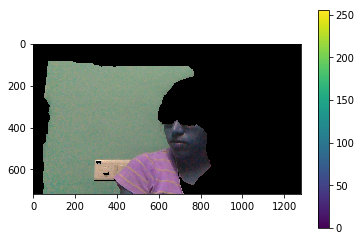

In [7]:
img = c.imread('Grab_Cut_Extraction.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,86,800,750)

c.grabCut(img,mask,rect,bgdModel,fgdModel,5,c.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

# Corner Detection

In [8]:
img=c.imread('corner_detection.jpg.png',c.IMREAD_GRAYSCALE)
# img_gray=c.cvtColor(img,c.COLOR_BGR2GRAY)

img=np.float32(img)

corners=c.goodFeaturesToTrack(img,50,0.01,10)
corners=np.int0(corners)

for corner in corners:
    x,y=corner.ravel()
    c.circle(img,(x,y),3,255,-1)
    
c.imshow('corner',img)



In [8]:
img = c.imread('opencv-corner-detection-sample.jpg')
gray = c.cvtColor(img,c.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = c.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    c.circle(img,(x,y),3,255,-1)
    
c.imshow('Corner',img)

## Feature Matching

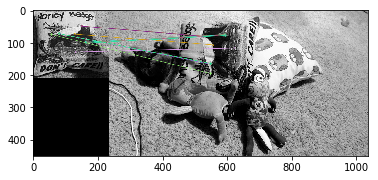

In [2]:
img1=c.imread('opencv-feature-matching-template.jpg',0)
img2=c.imread('opencv-feature-matching-image.jpg',0)

orb=c.ORB_create()

kp1,des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)

bf=c.BFMatcher(c.NORM_HAMMING,crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = c.drawMatches(img1,kp1,img2,kp2,matches[:12],None, flags=2)
plt.imshow(img3)
plt.show()


## MOG Background Reduction

In [5]:
cap=c.VideoCapture(0)
#cap=c.VideoCapture('opencv-python-foreground.mp4')
fgbg=c.createBackgroundSubtractorMOG2()

fourcc = c.VideoWriter_fourcc(*'XVID')
out = c.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while True:
    ret,frame=cap.read()
    fgmask=fgbg.apply(frame)
    out.write(fgmask)
    
    c.imshow('original',frame)
    c.imshow('fgmask',fgmask)
    
#     out.write(fgmask)
    
    if c.waitKey(1) & 0xFF==ord('q'):
        break
c.destroyAllWindows()
cap.release()
out.release()


## Haar Cascade Face and Eye Detection

In [2]:
face_cascade=c.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=c.CascadeClassifier('haarcascade_eye.xml')

cap=c.VideoCapture(0)

while True:
    ret,img=cap.read()
    gray=c.cvtColor(img,c.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        c.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            c.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
            
    c.imshow("img",img)
    if c.waitKey(1) & 0xFF==ord('q'):
            break
c.destroyAllWindows()
cap.release()